# HRI Trust Dataset Exploration

This Jupyter Notebook explores the 'hri_trust_studies.csv' dataset, which contains information from empirical studies on trust in human-robot interaction (HRI).


In [6]:
# Import Libraries
# We will use pandas for data manipulation, matplotlib and seaborn for data visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for seaborn
sns.set(style="whitegrid")

In [ ]:
# Load the dataset from the CSV file using pandas
try:
    df = pd.read_csv('hri_trust_studies.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'hri_trust_studies.csv' not found. Make sure the file is in the same directory as this notebook.")
    exit() # Exit if the file is not found

# Let's start by displaying some basic information about the dataframe, and displaying the head (first 5 rows)
print("## DataFrame Information")
df.info()

print("\n## First 5 rows of the dataset:")
print(df.head())

Dataset loaded successfully!
## DataFrame Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 49 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Author                                                       763 non-null    object 
 1   Title                                                        763 non-null    object 
 2   Publication Year                                             763 non-null    int64  
 3   number_of_studies                                            763 non-null    int64  
 4   basic_study_info.initial_participants                        763 non-null    int64  
 5   basic_study_info.valid_participants                          762 non-null    float64
 6   basic_study_info.excluded_participants                       763 non-null    int64  
 7   basic_study_info.exclusion


## Studies per year
Publication Year
2000      2
2001      2
2002      1
2003      4
2004      3
2007      1
2008      2
2009      2
2010      4
2011      6
2012     13
2013     15
2014     19
2015     20
2016     53
2017     48
2018     55
2019     81
2020    103
2021     74
2022     48
2023    117
2024     90
Name: count, dtype: int64


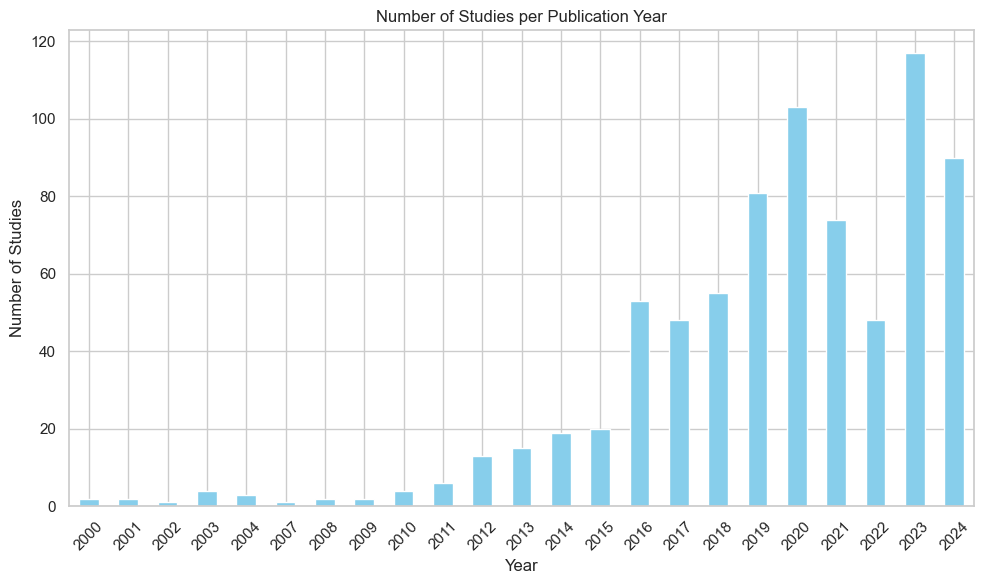

In [ ]:
# 1. Study Counts and Distribution by Year
# Let's perform some basic descriptive analysis
# We will analyze how many studies per year, and will visualize this to show the evolution of the area over time

study_counts_by_year = df['Publication Year'].value_counts().sort_index()
print("\n## Studies per year")
print(study_counts_by_year)
plt.figure(figsize=(10, 6))
study_counts_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Studies per Publication Year')
plt.xlabel('Year')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## Data Collection Settings Count:
basic_study_info.data_collection_setting
Controlled Lab Environment    467
Online Crowdsourcing          216
Real-World Environment         35
Educational Setting            24
Survey/Interview               17
Simulation                      4
Name: count, dtype: int64


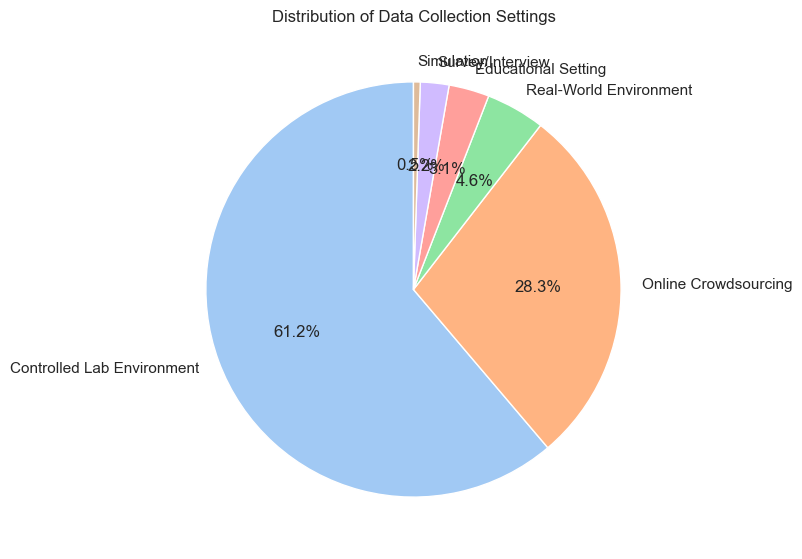

In [9]:
# 2. Distribution of Data Collection Settings
# Let's see the different data collection settings used in the study and their relative frequency
data_collection_settings_count = df['basic_study_info.data_collection_setting'].value_counts()
print("\n## Data Collection Settings Count:")
print(data_collection_settings_count)
plt.figure(figsize=(8, 8))
data_collection_settings_count.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title("Distribution of Data Collection Settings")
plt.ylabel("")
plt.tight_layout()
plt.show()


## High Level Task Count:
task_classification.high_level_task
Evaluation      200
Supervision     180
Manipulation    109
Game             95
Social           91
Navigation       88
Name: count, dtype: int64


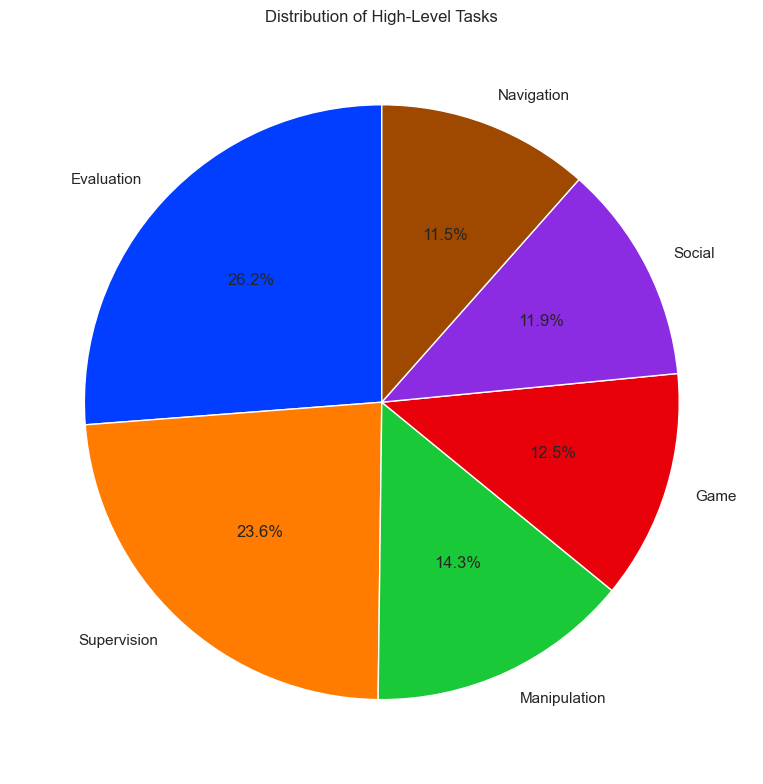

In [12]:
# 3. Distribution of High Level Tasks
# Let's explore the different high level tasks carried out in these studies, and their relative frequency
high_level_task_count = df['task_classification.high_level_task'].value_counts()
print("\n## High Level Task Count:")
print(high_level_task_count)

plt.figure(figsize=(8, 8))
high_level_task_count.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('bright'), startangle=90)
plt.title("Distribution of High-Level Tasks")
plt.ylabel("") 
plt.tight_layout()
plt.show()


## Top 10 Most Impactful Manipulations (that impact trust):
Robot-accuracy                                        170
Robot-verbal-communication-content                     64
Robot-autonomy                                         46
Robot-interface-design                                 22
Task-complexity                                        17
Robot-accuracy; Robot-verbal-communication-content     16
Robot-task-strategy                                    16
Robot-aesthetics                                       16
Robot-verbal-communication-content; Robot-accuracy     15
Task-environment                                       12
Name: count, dtype: int64


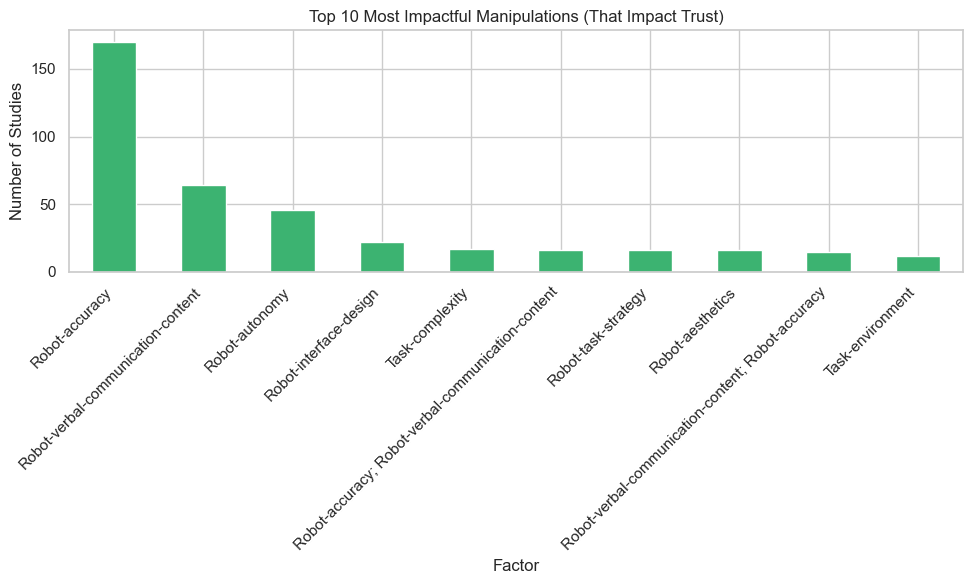

In [16]:
# 4. Most Impactful Experimental Manipulations
# Let's see the most commonly identified experimental manipulations in the studies.
# To perform this analysis, we need to flatten the lists from `experimental_manipulation.factors_that_impacted_trust` (as each cell may have multiple factors separated by a comma)
def flatten_list_column(df, column):
    """Flattens a list column into individual elements and counts them."""
    flat_list = []
    for item_list in df[column]:
        if isinstance(item_list, str):
          if item_list != 'N/A': # avoid errors with any missing values
            items = item_list.split(', ')
            flat_list.extend(items)
    return pd.Series(flat_list)

impactful_factors_flat = flatten_list_column(df, 'experimental_manipulation.factors_that_impacted_trust')
impactful_factors = impactful_factors_flat.value_counts().head(10)
print("\n## Top 10 Most Impactful Manipulations (that impact trust):")
print(impactful_factors)

plt.figure(figsize=(10, 6))
impactful_factors.plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Most Impactful Manipulations (That Impact Trust)')
plt.xlabel('Factor')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Robot Autonomy Level Counts
robot_autonomy_level.classification
fully autonomous (limited adaptation)     63
not autonomous                            78
pre-programmed (non-adaptive)            273
shared control (adaptive)                 50
shared control (fixed rules)             186
wizard of oz (directly controlled)       111
Name: count, dtype: int64


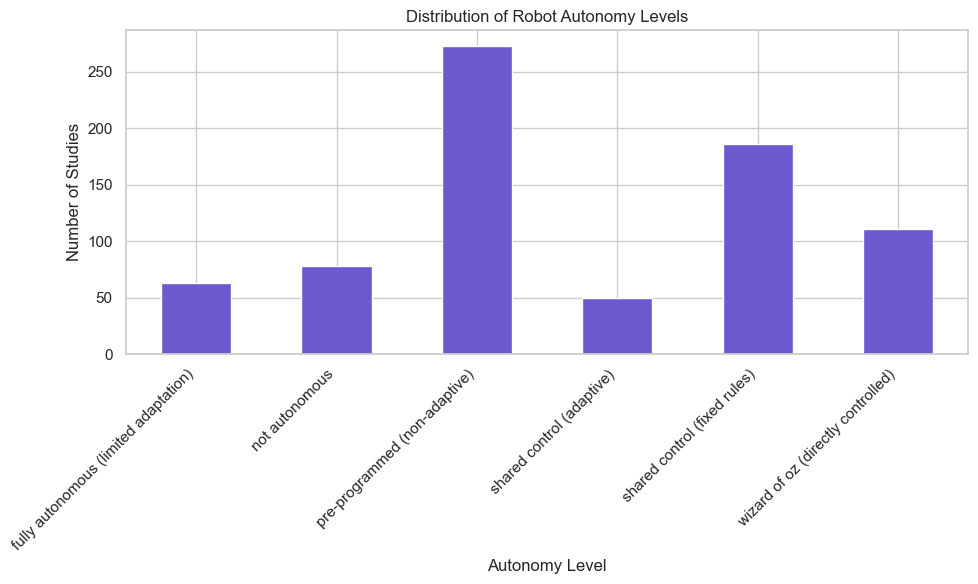

In [21]:
# 5. Robot Autonomy Level Distribution
# Let's look at the different robot autonomy levels and display their relative counts
autonomy_level_counts = df['robot_autonomy_level.classification'].value_counts().sort_index()
print("\n## Robot Autonomy Level Counts")
print(autonomy_level_counts)

plt.figure(figsize=(10, 6))
autonomy_level_counts.plot(kind='bar', color='slateblue')
plt.title('Distribution of Robot Autonomy Levels')
plt.xlabel('Autonomy Level')
plt.ylabel('Number of Studies')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()